# Police Shootings in the United States Data Analysis

Police brutality in the United States has been a national issue since the 20th century. The public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues.

The department offered some tips - the public opinion indicates that there's something systematically fishy about the police actions against civilians. We also know that some **states** differ from the others, some **cities** are different from others, **race equality** is still an unanswered question. There's also some talk about huge spendings on police, rumors about **mental issues** of those getting shot. Government is all about **prioritizing** - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

Analysis Objectives:

First of all, I will take a look at data and its quality, handle null values and inconsistencies, if there are any. 
Then I will analyse data throughout the United States and answer the following questions:
- Are there any obvious issues to look at? E.g. race, gender, signs of mental illness, ect. 
- Which states have the highest number of shootings?

After identifying the states, identify the main issues and provide further steps. 

## 1. Data and Libraries Preparation

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
custom_palette = ['#810f7c', '#88419d', '#8c6bb1', '#8c96c6', '#9ebcda', '#bfd3e6', '#e0ecf4', '#f7fcfd']
sns.set_palette(custom_palette)
sns.set_style("white")
sns.set(rc={'figure.figsize':(8,4)})
sns.set_palette(custom_palette)

I will import data from kaggle.com

In [3]:
shootings_data = pd.read_csv('data/database.csv')
shootings_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


I will take a look at how many rows and columns we have in shootings_data dataset:

In [4]:
shootings_data.shape

(2142, 14)

#### 1.1. What are the data types?

In [5]:
shootings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

There are a few missing values in:
* name, 
* race, 
* age, 
* gender
* flee.

The data types are almost all are categorical data, except for age. 
I can see that date was read as object, I will convert it to date. 

#### 1.2. Date conversion

In [6]:
shootings_data['date'] = pd.to_datetime(shootings_data['date'])
shootings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2142 non-null   int64         
 1   name                     2123 non-null   object        
 2   date                     2142 non-null   datetime64[ns]
 3   manner_of_death          2142 non-null   object        
 4   armed                    2136 non-null   object        
 5   age                      2099 non-null   float64       
 6   gender                   2141 non-null   object        
 7   race                     2039 non-null   object        
 8   city                     2142 non-null   object        
 9   state                    2142 non-null   object        
 10  signs_of_mental_illness  2142 non-null   bool          
 11  threat_level             2142 non-null   object        
 12  flee                     2106 non-

#### 1.3. id column investigation and unique values

In [7]:
shootings_data['id'].unique()

array([   3,    4,    5, ..., 2391, 2393, 2394])

In [8]:
shootings_data['id'].nunique()

2142

Since all of the values are unique, we can use id as the index. 

In [9]:
shootings_data.set_index("id")

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,James Leroy Marker,2017-02-26,shot,gun,66.0,M,W,Floral City,FL,False,other,Car,False
2378,Joey J. Bridges,2017-02-27,shot,gun,27.0,M,W,Shelby,NC,True,attack,Foot,False
2391,Shawn M. Igers,2017-02-27,shot,gun,40.0,M,W,Corning,WI,False,attack,Not fleeing,False


#### 1.4. Are there any duplicated rows? 

In [10]:
shootings_data.duplicated().any()

False

There are no duplicated rows in this dataset. 

### 1.2. Columns validation

#### 1.2.1. Manner of death

In [11]:
shootings_data['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

Only two values, shot and shot tasered. Column is clean.

#### 1.2.2. Armed or no weapon?

In [12]:
shootings_data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'pole and knife'], dtype=o

Some things to note:
- undetermined and unknown weapon 
    - as per documentation: 
        * undetermined - it is unknown if the person was armed or not 
        * unknown weapon - not clear what kind of weapon it was
- motorcycle or vehicle put as weapon, might have been mistype
- There are null values (nan):
    - Could be any of the weapons or person was unarmed. 

**Checking rows with 'armed' value null**

In [13]:
shootings_data.isnull()
rows_with_null_armed_col = shootings_data[shootings_data['armed'].isnull()]
rows_with_null_armed_col

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,2015-08-15,shot,NaN,34.0,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,2016-07-28,shot,NaN,47.0,M,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,2016-09-30,shot,NaN,38.0,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,2016-10-07,shot,NaN,57.0,M,B,Macon,GA,False,other,Not fleeing,False
1825,2037,NaN,2016-11-11,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False
1975,2203,Gilbert Zambronio-Lovato,2017-01-07,shot,NaN,38.0,M,H,Albuquerque,NM,False,other,Not fleeing,False


These rows will be defined as Undetermined

In [14]:
shootings_data['armed'].fillna('undetermined', inplace=True)

There are no null values in 'armed' column left. 

In [15]:
shootings_data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'pole and knife'], dtype=object

In [16]:
shootings_data['armed'].nunique()

64

There are 64 unique values for 'armed' type. 

#### 1.2.3. age

Previously it was identified that there are missing values for age column. 

In [17]:
shootings_data[shootings_data['age'].isnull()].shape

(43, 14)

43 rows are missing a value for 'age' column

In [18]:
shootings_data[shootings_data['age'].isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,2015-08-29,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,2015-09-17,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,2015-10-12,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,2015-10-24,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
818,964,Deaunte Lamar Bell,2015-10-29,shot,gun,NaN,M,B,Columbus,OH,False,other,Not fleeing,False
928,1074,NaN,2015-12-10,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False
936,1086,Efrain Villanueva,2015-12-12,shot,unknown weapon,NaN,M,NaN,Aurora,CO,False,attack,NaN,False
950,1097,Bryant Neil Duncan,2015-12-16,shot,knife,NaN,M,W,Camarillo,CA,True,attack,Not fleeing,False
962,1110,Michael Noel,2015-12-21,shot,unarmed,NaN,M,B,Breaux Bridge,LA,True,other,Not fleeing,False


I will leave the records that have null age, as it has Name not provided as well we can classify those records as unidentified victims.

#### 1.2.4. gender

In [19]:
shootings_data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [20]:
shootings_data[shootings_data['gender'].isnull()].shape

(1, 14)

In [21]:
shootings_data[shootings_data['gender'].isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2133,2384,NaN,2017-02-25,shot,gun,NaN,NaN,NaN,Lumpkin,GA,False,attack,Car,False


only one row with gender missing, also, name is missing, person is not identified

In [22]:
shootings_data['gender'].fillna('unknown', inplace=True)
shootings_data[shootings_data['gender'].isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


I will replace M and F to readable format

In [23]:
shootings_data['gender'] = shootings_data['gender'].replace({'M': 'male', 'F': 'female'})
shootings_data['gender'].unique()

array(['male', 'female', 'unknown'], dtype=object)

#### 1.2.5. race

In [24]:
shootings_data['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [25]:
shootings_data['race'] = shootings_data['race'].replace({'A': 'asian', 'W': 'white', 'H':'hispanic', 
                                                        'B':'black', 'O':'other', 'N':'native american'})
shootings_data['race'].fillna('unknown', inplace=True)
shootings_data['race'].unique()

array(['asian', 'white', 'hispanic', 'black', 'other', 'unknown',
       'native american'], dtype=object)

#### 1.2.6. city

In [26]:
shootings_data['city'].unique()

array(['Shelton', 'Aloha', 'Wichita', ..., 'Aragonite', 'Floral City',
       'Shelby'], dtype=object)

In [27]:
shootings_data['city'].nunique()

1247

There were no null values as checked before. 

#### 1.2.7. state

In [28]:
states_in_dataset = shootings_data['state'].unique()

In [29]:
shootings_data['state'].nunique()

51

There are 50 states in US and Washington DC.

In [30]:
us_states = ['AL', "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

for state in states_in_dataset:
    if state not in us_states:
        print(state)

DC


Washington, D.C. is not a state; it is a federal district and the capital of the United States. It is not part of any state, and it does not have a state abbreviation. The appropriate designation for Washington, D.C., is simply "DC." It is a unique entity with its own local government but is under the jurisdiction of the U.S. federal government.

Since states are in abbreviations I will load file with names and then join with shootings_data

In [31]:
states = pd.read_csv('data/states.csv')
states.head()

,full_state_name,state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [32]:
shootings_data = pd.merge(shootings_data, states, how="outer", on="state")
shootings_data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,full_state_name
2137,1115,Kenneth Stephens,2015-12-22,shot,gun,56.0,male,white,Burlington,VT,False,attack,Not fleeing,True,Vermont
2138,1395,"Ralph ""Phil"" Grenon",2016-03-21,shot and Tasered,knife,76.0,male,white,Burlington,VT,True,other,Not fleeing,True,Vermont
2139,1889,Jesse Beshaw,2016-09-16,shot,unarmed,29.0,male,native american,Winooski,VT,False,undetermined,Foot,True,Vermont
2140,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,male,black,Pawtucket,RI,False,attack,Foot,False,Rhode Island
2141,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,male,hispanic,Tiverton,RI,False,attack,Car,False,Rhode Island


In [33]:
shootings_data = shootings_data.drop('state', axis=1)
shootings_data = shootings_data.rename(columns={'full_state_name': 'state'})
shootings_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,state
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,male,asian,Shelton,True,attack,Not fleeing,False,Washington
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,male,hispanic,Pasco,True,other,Foot,False,Washington
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,male,white,Sumas,True,attack,Not fleeing,False,Washington
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,male,native american,Lakewood,True,other,Foot,False,Washington
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,male,white,Kennewick,True,attack,Not fleeing,False,Washington


#### 1.2.8. signs of mental illness

In [34]:
shootings_data['signs_of_mental_illness'].unique()

array([ True, False])

No issues with this column, only true or false values. 

#### 1.2.9. threat level

In [35]:
shootings_data['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

No issues with threat level column as well.

#### 1.2.10. flee

In [36]:
shootings_data['flee'].unique()

array(['Not fleeing', 'Foot', 'Car', nan, 'Other'], dtype=object)

There is null values, these will be saved as unknown:

In [37]:
shootings_data['flee'].fillna('unknown', inplace=True)
shootings_data['flee'].unique()

array(['Not fleeing', 'Foot', 'Car', 'unknown', 'Other'], dtype=object)

#### 1.2.11. body camera

In [38]:
shootings_data['body_camera'].unique()

array([False,  True])

no issues with body camera field, no null values, only True or False. 

## 2. Data Exploration

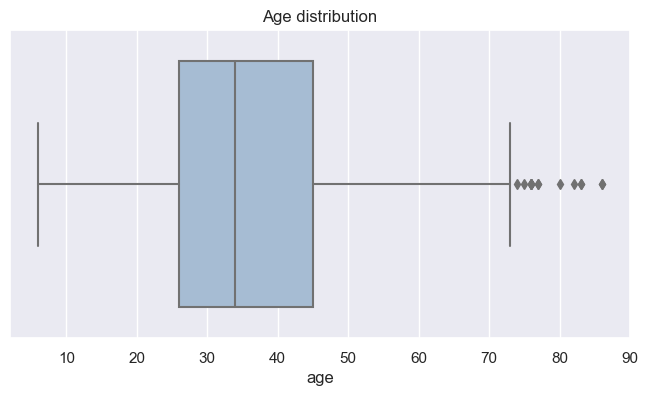

In [39]:
#Univariate box plot 
ax = sns.boxplot(data=shootings_data, x='age',color=custom_palette[4])
ax.set_title('Age distribution');

We see that the median value for a person being killed is around 32. There are a few outliers that the person was 70-90 years old. 

Note, that null values were not removed. 

### 2.1. Fatal shootings based on gender

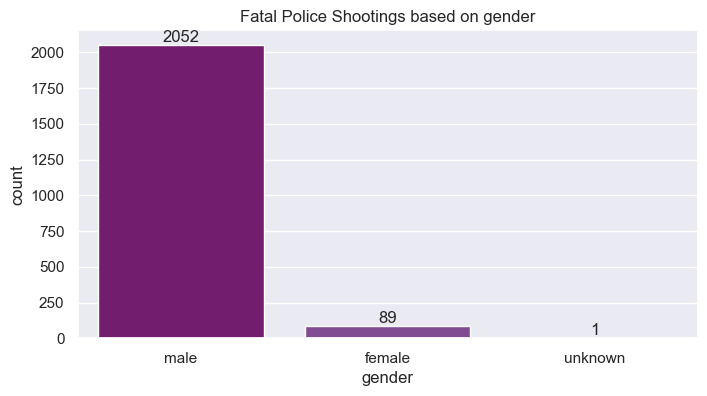

In [40]:
ax = sns.countplot(x='gender', data=shootings_data);
ax.bar_label(ax.containers[0]);
ax.set_title("Fatal Police Shootings based on gender");

Men are usually shooted fatally by police. 

### 2.2. Fatal shootings based on mental illness

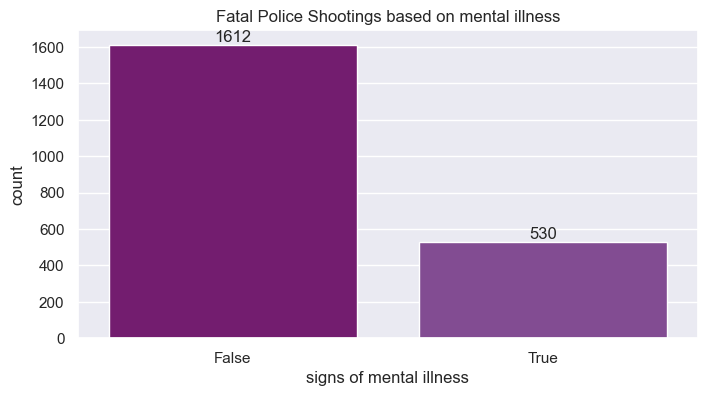

In [41]:
ax = sns.countplot(x='signs_of_mental_illness', data=shootings_data);
ax.bar_label(ax.containers[0]);
ax.set_title("Fatal Police Shootings based on mental illness");
ax.set_xlabel("signs of mental illness");

People with no mental illness signs are killed more. This is absolute values, it would be better to check against population of these groups (weighted grouping).

In 2016, an estimated 44.7 million adults aged 18 or older (18.3 percent) had any mental illness (AMI) in the past year.

In [45]:
group_by_mental_illness = pd.DataFrame(shootings_data.groupby('signs_of_mental_illness')['id'].count())
group_by_mental_illness

,id
signs_of_mental_illness,
False,1612
True,530


In [46]:
group_by_mental_illness['population'] = [275300000, 44700000]
group_by_mental_illness['ratio'] = group_by_mental_illness.\
                                    apply(lambda row: row.id / row.population, 
                                          axis=1)
group_by_mental_illness

,id,population,ratio
signs_of_mental_illness,,,
False,1612,275300000,0.000006
True,530,44700000,0.000012


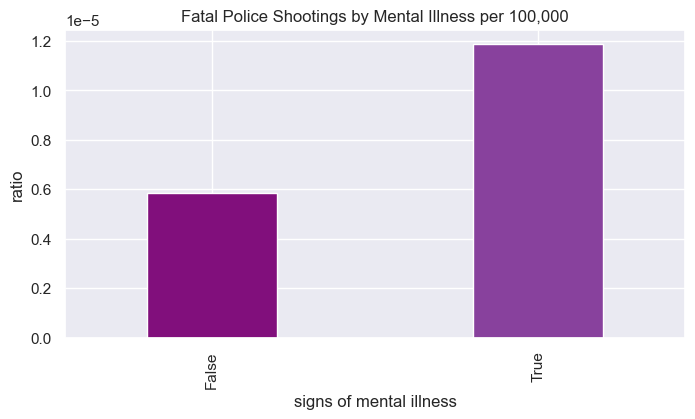

In [47]:
# Bar plot papildyti su tekstu
ax = group_by_mental_illness.plot(kind='bar', y='ratio',
                                  title='Fatal Police Shootings by Mental Illness per 100,000', 
                                  xlabel='signs of mental illness',
                                  ylabel='ratio',
                                  width=0.4,
                                  color=custom_palette);
ax.legend_.remove()

We can see that when number of people are taken into an account, people with signs of mental illness are shooted more often. 

### 2.3. Fatal shootings based on threat level

In [48]:
# Data prep 
threat_level_counts = shootings_data['threat_level'].value_counts()
threat_level_counts

attack          1381
other            629
undetermined     132
Name: threat_level, dtype: int64

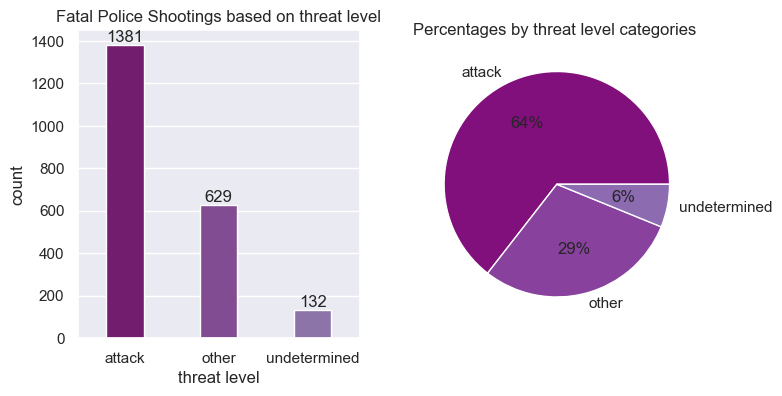

In [49]:
plt.subplot(121)
ax = sns.countplot(x='threat_level', data=shootings_data, width=0.4);
ax.bar_label(ax.containers[0]);
ax.set_title("Fatal Police Shootings based on threat level");
ax.set_xlabel("threat level");

plt.subplot(122)
ax2 = plt.pie(threat_level_counts, labels = threat_level_counts.index, autopct="%.0f%%");
plt.title("Percentages by threat level categories ");

More than half police officers were attacked, other and undetermined cases could have been attacked as well, as per dataset documentation.

### 2.4. Fatal shootings based on fleeing

In [50]:
# Data prep 
flee_counts = shootings_data['flee'].value_counts()
flee_counts

Not fleeing    1453
Car             318
Foot            254
Other            81
unknown          36
Name: flee, dtype: int64

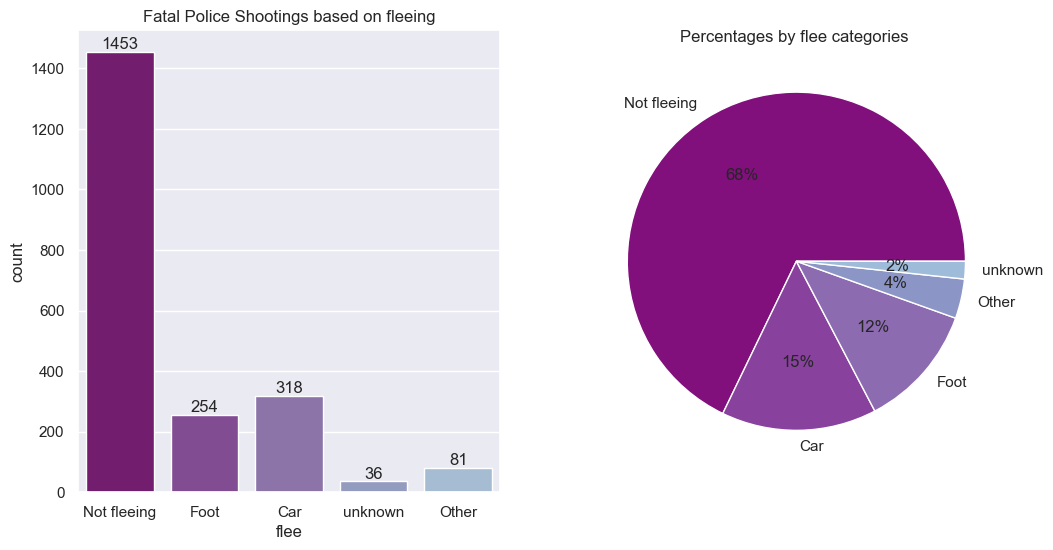

In [51]:
# Bar plot
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(x='flee', data=shootings_data);
ax.bar_label(ax.containers[0]);
ax.set_title("Fatal Police Shootings based on fleeing");

# Pie chart
plt.subplot(122)
ax2 = plt.pie(flee_counts, labels = flee_counts.index, autopct="%.0f%%");
plt.title("Percentages by flee categories ");

More than half of the victims were not trying to escape. Investigate why the person was shot, is it because police officer was attacked?

### 2.5. Fatal shootings based on whether it had body camera footage

In [52]:
# Data prep 
body_camera_counts = shootings_data['body_camera'].value_counts()

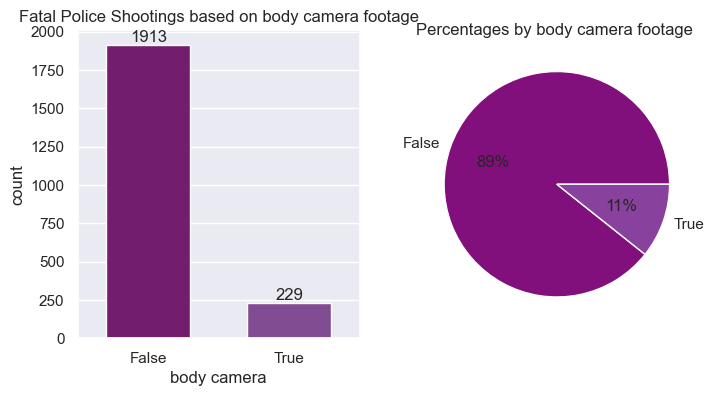

In [53]:
# Bar plot
plt.subplot(121)
ax = sns.countplot(x='body_camera', data=shootings_data, width=0.6);
ax.bar_label(ax.containers[0]);
ax.set_title("Fatal Police Shootings based on body camera footage");
ax.set_xlabel("body camera")
ax.set_xhvline
# Pie chart
plt.subplot(122)
ax2 = plt.pie(body_camera_counts, labels = body_camera_counts.index, autopct="%.0f%%");
plt.title("Percentages by body camera footage ");

Almost 90% of police officers had their cameras turned off or footage is not available, the stats might improve if the cameras could not be shut off or footage deleted. 

### 2.6. Fatal shootings based on race

#### 2.6.1. Counts analysis

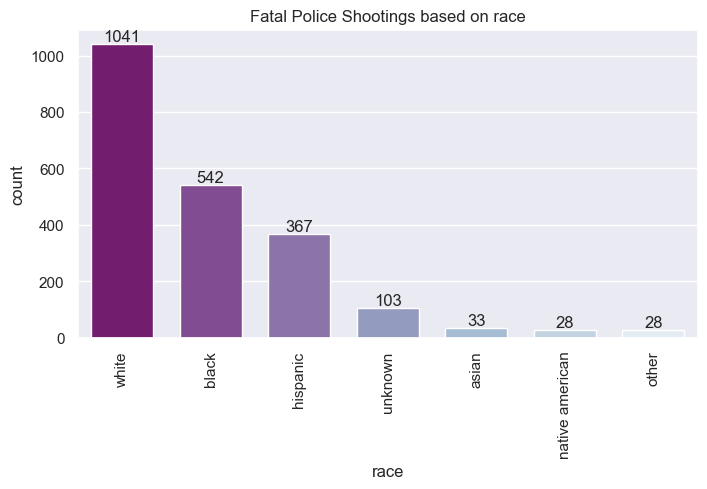

In [54]:
ax = sns.countplot(x='race', data=shootings_data, width=0.7, order = shootings_data['race'].value_counts().index);
ax.bar_label(ax.containers[0]);
ax.set_title("Fatal Police Shootings based on race");
plt.xticks(rotation=90);

The biggest count is for white race, however, it is the most common race in the US, I will check against the populations.

#### 2.6.2. Analysis based on populations

![Image](https://datacenter.aecf.org/~/media/1481/what-population-data-say-2018.png)

In [55]:
shootings_data['race'].value_counts().index

Index(['white', 'black', 'hispanic', 'unknown', 'asian', 'native american',
       'other'],
      dtype='object')

In [56]:
population_count_by_race = np.array([0.61, 0.12, 0.18, 1, 0.05, 0.007, 0.02]) * 322941311
population_count_by_race

array([1.96994200e+08, 3.87529573e+07, 5.81294360e+07, 3.22941311e+08,
       1.61470656e+07, 2.26058918e+06, 6.45882622e+06])

In [57]:
# Data Prep 
shootings_by_race = pd.DataFrame(shootings_data['race'].value_counts())
shootings_by_race = shootings_by_race.rename(columns={'race':'count_by_race'})
shootings_by_race['population_by_race'] = population_count_by_race
shootings_by_race['race_count_by_population'] = \
                            shootings_by_race['count_by_race'] / shootings_by_race['population_by_race']
shootings_by_race = shootings_by_race.sort_values(by='race_count_by_population', ascending=False)

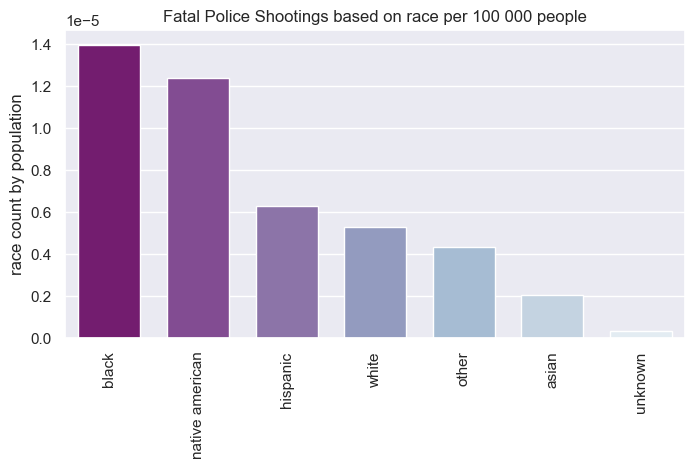

In [58]:
#Bar plot
ax = sns.barplot(x=shootings_by_race.index, y='race_count_by_population', data=shootings_by_race, width=0.7);
ax.set_title("Fatal Police Shootings based on race per 100 000 people");
plt.xticks(rotation=90);
ax.set_ylabel("race count by population");

Important to note that black, native american and hispanic people are shooted more often.

I will compare age differences between different races.

#### 2.6.3. Age Analysis by race

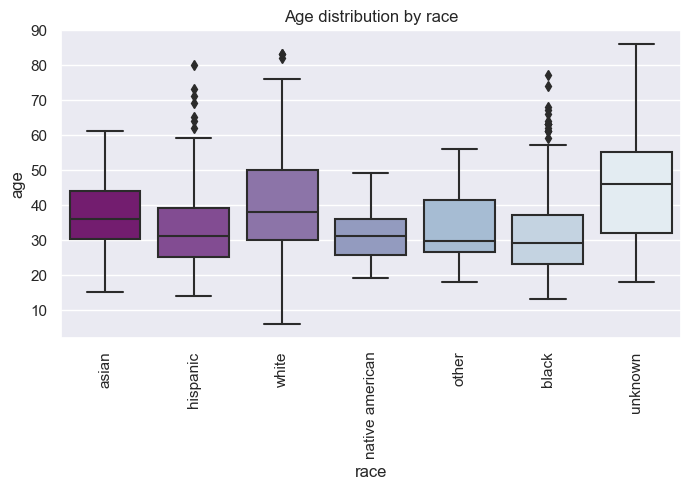

In [59]:
ax = sns.boxplot(data=shootings_data, x='race', y='age');
plt.xticks(rotation=90);
plt.title('Age distribution by race');

The youngest median value is for black race, where the oldest - white. All other races have lower age median value.

Hispanic and black people have biggest number of outliers, however, white race has biggest value range.

#### 2.6.4. Analysis based on Gender

In [60]:
selected_genders = ["male", "female"]
filtered_genders = shootings_data[shootings_data['gender'].isin(selected_genders)]

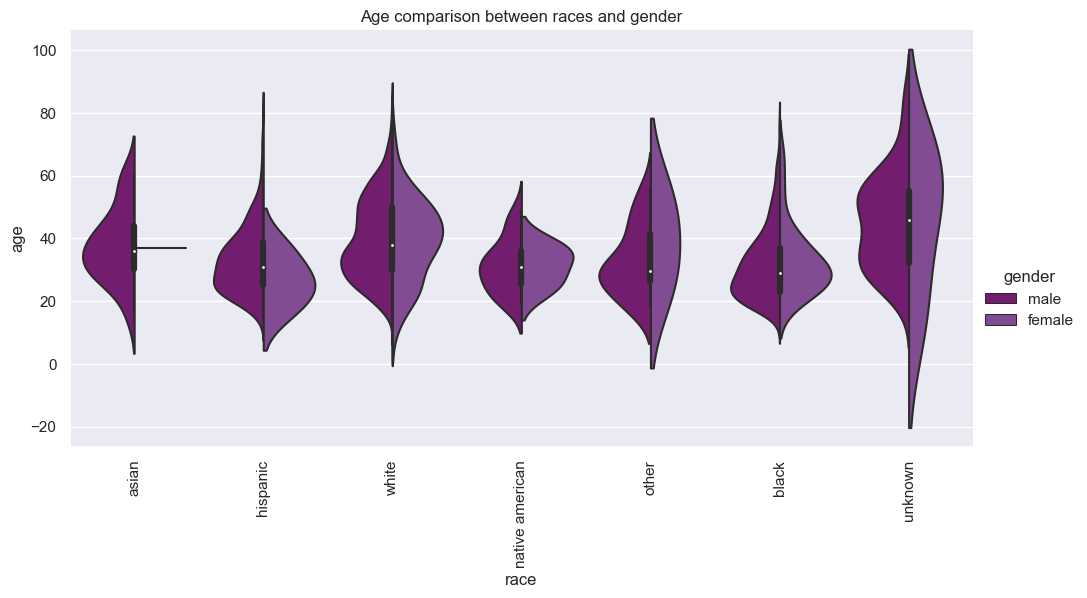

In [61]:
sns.catplot(data=filtered_genders, x='race', y='age', hue='gender',
            kind='violin', split=True,
            height=5,
            aspect=2
           );
plt.title('Age comparison between races and gender');
plt.xticks(rotation=90);

There are no asian women victims in this dataset. 

We can see that disribution for hispanic, native american and black are similar, where for white the peak distribution for male men is younger than for women. 

### 2.7. Analysis by weapon

In [62]:
# Data Prep
armed_counts = shootings_data['armed'].value_counts()
armed_counts = armed_counts.head()
armed_counts

gun             1173
knife            319
unarmed          155
vehicle          136
undetermined     107
Name: armed, dtype: int64

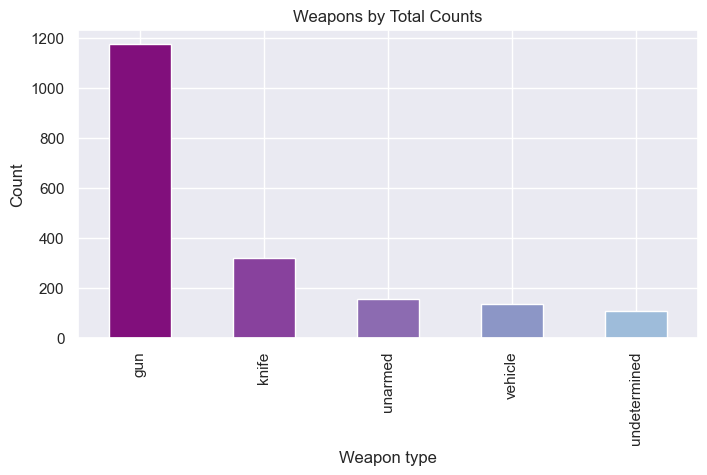

In [63]:
# Bar plot
ax = armed_counts.plot(kind='bar', x='armed', title='Weapons by Total Counts', color=custom_palette);
ax.set_xlabel("Weapon type");
ax.set_ylabel("Count");

Two the most popular weapons are gun and knife or unarmed. 

#### 2.6.5. Overview

Looking at the united States overall, we can identify few issues:
1. Most of the shootings does not have body camera data, this needs to be investigated what could be done to improve the cameras that the camera could not be shut off or footage deleted. 
2. There is a significant difference that the people who have mental illness signs are shot more, the government should work on the ways to improve police officers awareness.
3. Racial inequality still stands - minorities (black, native american, hispanic) are shot more than white race. 
4. Police officers are reporting attack and that the victim was with a gun - there should be gun control review. 

### 2.8. U.S. analysis by states

#### 2.8.1. Analysis by counts

In [64]:
# Data Prep
state_counts = shootings_data['state'].value_counts().sort_values(ascending=False)

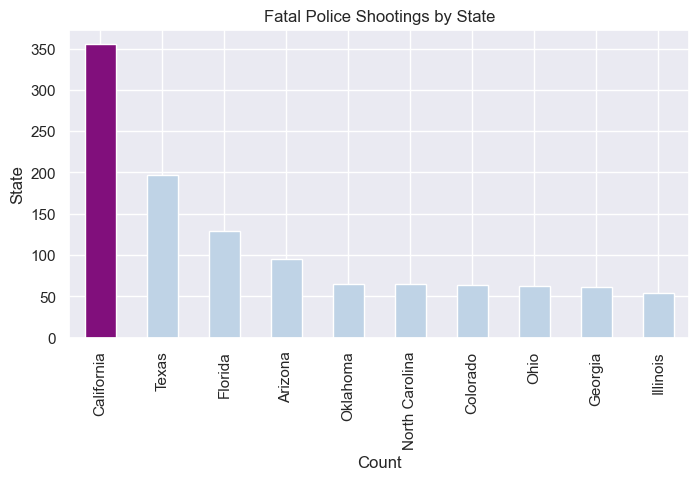

In [65]:
# Count plot
ax = state_counts.nlargest(10).plot(kind='bar', x='state', title='Fatal Police Shootings by State', 
                                    color=[custom_palette[0] if x == state_counts.idxmax() else custom_palette[5] for x in state_counts.index]);
ax.set_xlabel("Count");
ax.set_ylabel("State");

We can see that the biggest victim count is in California. However 

**Counts for Top 10 states with Race**

In [66]:
#Data Prep for stacked plot
state_counts_top_10_a = pd.DataFrame(shootings_data.groupby(['state', 'race'])['id'].count())
state_counts_top_10_a = state_counts_top_10_a.unstack(level='race')
state_counts_top_10_a.columns = state_counts_top_10_a.columns.get_level_values(1)
state_counts_top_10_a.fillna(0, inplace=True)
state_counts_top_10_a['sum_of_all'] = state_counts_top_10_a.sum(axis=1)
state_counts_top_10_a = state_counts_top_10_a.sort_values(by='sum_of_all', ascending=False)
state_counts_top_10_a = state_counts_top_10_a.head(10)
state_counts_top_10_a = state_counts_top_10_a.drop('sum_of_all', axis=1)
state_counts_top_10_a = state_counts_top_10_a[::-1]

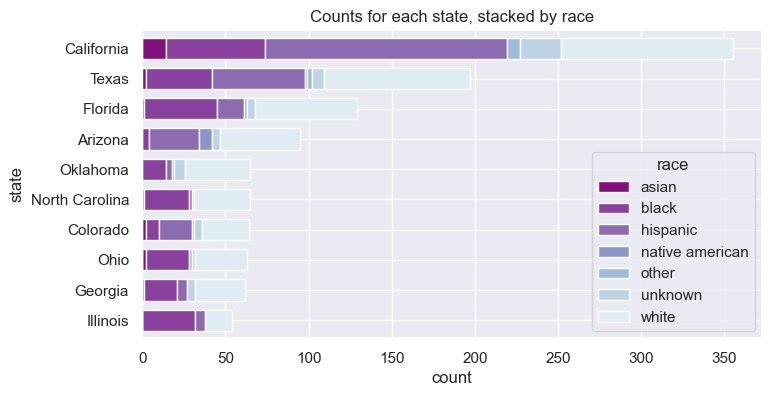

In [67]:
#Stacked bar plot
ax = state_counts_top_10_a.plot(kind = 'barh', stacked = True, width=0.7, color = custom_palette);
plt.title('Counts for each state, stacked by race');
ax.set_xlabel('count');

We can see that each state has biggest counts for races: black, hispanic and white.

I will join population for states as the biggest count does not take into account the population within that state.

#### 2.8.2. Analysis counts by population size

In [68]:
population_by_state = pd.read_csv('data/population.txt', sep='\t')

Gonna leave only 2016 year data, it will be enough of precision for this project.

In [69]:
population_by_state = population_by_state.drop(['2015','2017'], axis=1)
population_by_state = population_by_state.rename(columns={'2016':'population', 'GeographicArea':'state'})

In [70]:
# Data cleaning
state_counts_df = pd.DataFrame(state_counts).reset_index()
state_counts_df = state_counts_df.rename(columns={'state':'count_of_shootings', 'index':'state'})

In [71]:
# Merging counts by state and population
state_counts_and_population = pd.merge(state_counts_df, population_by_state,
                                       on='state', how='left')
state_counts_and_population.head()
state_counts_and_population['state'].nunique()

51

I will add a new column and divide count by population

In [72]:
state_counts_and_population['ratio_count_by_population'] = state_counts_and_population['count_of_shootings'] / \
                                                     state_counts_and_population['population']

ratio_mean = state_counts_and_population['ratio_count_by_population'].mean()
ratio_median = state_counts_and_population['ratio_count_by_population'].median()

print(f"Mean value for the count by population is {ratio_mean}")
print(f"Median value the count by population is {ratio_median}")

state_counts_and_population = state_counts_and_population.\
                               sort_values(by='ratio_count_by_population', 
                                           ascending=False)

state_counts_and_population = state_counts_and_population[::-1]

Mean value for the count by population is 7.485405238571763e-06
Median value the count by population is 6.870859448324953e-06


We can see that mean and median value does not different much, we can say that the data is not skewed. We will take a look at the top ten and how their values compare to mean and median values. 

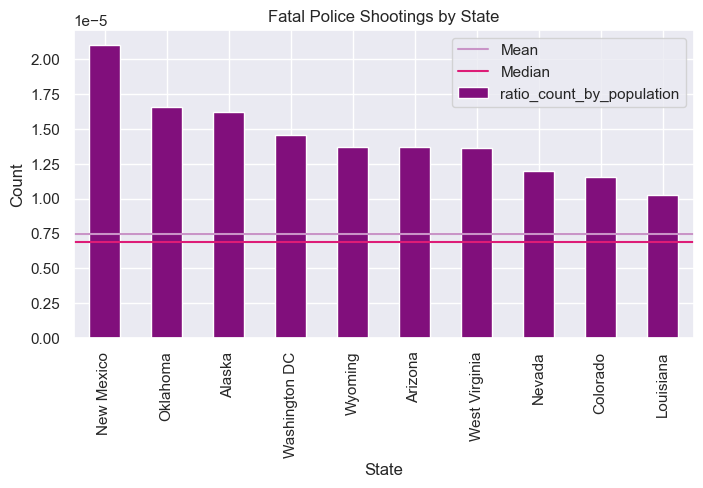

In [73]:
# Bar plot
ax = state_counts_and_population.nlargest(10, 'ratio_count_by_population').\
                plot(kind='bar', x='state', y='ratio_count_by_population',
                     title='Fatal Police Shootings by State', color=custom_palette[0]);
    
ax.set_xlabel("State");
ax.set_ylabel("Count");

plt.axhline(y = ratio_mean, color = '#c994c7', label = 'Mean');
plt.axhline(y = ratio_median, color='#dd1c77', label = 'Median');

ax.legend();


We can see from the graph above that all the states has a lot bigger than average or median values, for example New Mexico, Oklahoma, Alaska and Washington DC has more than twice bigger ratio. 

From the plot above we can see that New Mexico, Oklahoma, Alaska and Washington DC has the highest ratios.  These states will be the main focus for further analysis. 

### 2.9. Top 4 Analysis based on counts by population

In [74]:
# Data Prep 
new_mexico_data = shootings_data[shootings_data['state'] == 'New Mexico']
oklahoma_data = shootings_data[shootings_data['state'] == 'Oklahoma']
alaska_data = shootings_data[shootings_data['state'] == 'Alaska']
washington_dc_data = shootings_data[shootings_data['state'] == 'Washington DC']

Count the values for cities for each state

In [75]:
def get_value_counts(data, value):
    cities_count = data[value].value_counts()
    cities_count = cities_count[cities_count > 1]
    return cities_count

new_mexico_cities_count = get_value_counts(new_mexico_data, 'city')
oklahoma_cities_count = get_value_counts(oklahoma_data, 'city')
alaska_cities_count = get_value_counts(alaska_data, 'city')
washington_dc_cities_count = get_value_counts(washington_dc_data, 'city')

#### 2.9.1. Analysis by cities and their counts

/var/folders/b9/tfjp7s4163qc3r1rc5jt_8240000gn/T/ipykernel_71133/1467903662.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


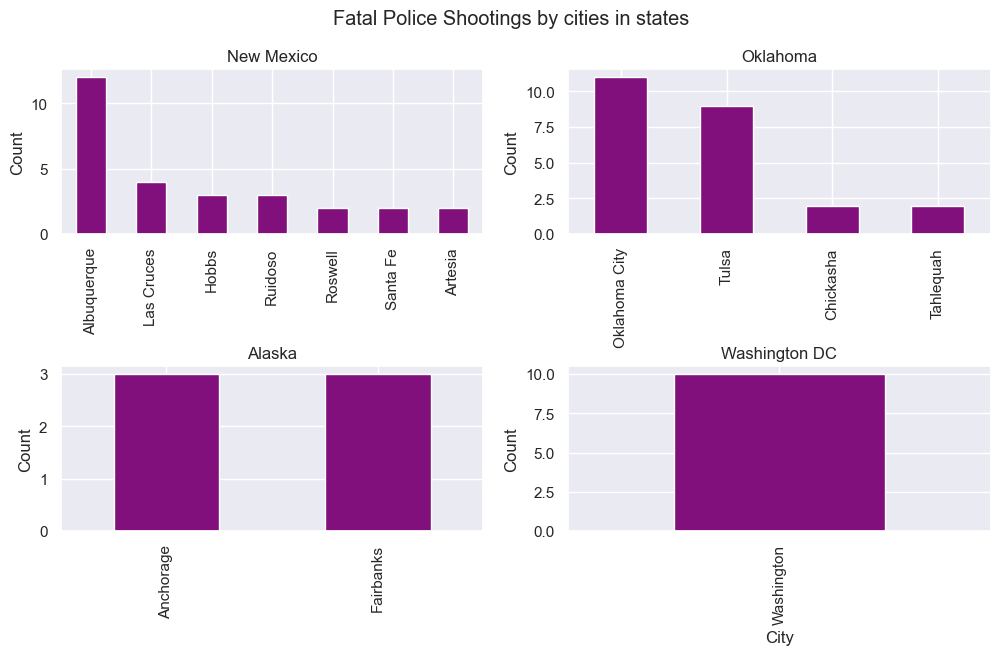

In [76]:
# Bar charts
fig = plt.subplots(figsize=(12, 6));
plt.subplot(221)
plt.suptitle('Fatal Police Shootings by cities in states')
ax = new_mexico_cities_count.plot(kind='bar', x='state', 
                                  title='New Mexico', 
                                  ylabel= 'Count',
                                  color=custom_palette[0]);
plt.subplot(222)
ax = oklahoma_cities_count.plot(kind='bar', x='state', 
                                  title='Oklahoma', 
                                  ylabel= 'Count',
                                  color=custom_palette[0]);

plt.subplots_adjust(hspace=0.8)

plt.subplot(223)
ax = alaska_cities_count.plot(kind='bar', x='state', 
                                  title='Alaska', 
                                  ylabel= 'Count',
                                  color=custom_palette[0]);
plt.subplot(224)
ax = washington_dc_cities_count.plot(kind='bar', x='state', 
                                  title='Washington DC', 
                                  ylabel= 'Count',
                                  color=custom_palette[0]);
ax.set_xlabel("City");
ax.set_ylabel("Count");

We can see that Albuquerque in New Mexico has the biggest count for shootings, Oklahoma - Oklahoma City, Alaska has the same counts both fot Anchorage and Fairbanks. Washington DC is a one city only state. This is not surprising as these cities are the biggest in those states. 

#### 2.9.2. Analysis by race counts

In [77]:
#Data Prep 
def count_by_group(data, value):
    """
    Count the occurrences of each group in the specified column of the DataFrame.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - value (str): The column name based on which the grouping is done.

    Returns:
    - pandas.Series: A Series containing the count of occurrences for each group,
                    sorted in descending order.
    """
    race_count = data.groupby(value)['name'].count().sort_values(ascending=False)
    race_count = race_count[::-1]
    return race_count

new_mexico_by_race = count_by_group(new_mexico_data, 'race')
oklahoma_by_race = count_by_group(oklahoma_data, 'race')
alaska_by_race = count_by_group(alaska_data, 'race')
washington_dc_by_race = count_by_group(washington_dc_data, 'race')

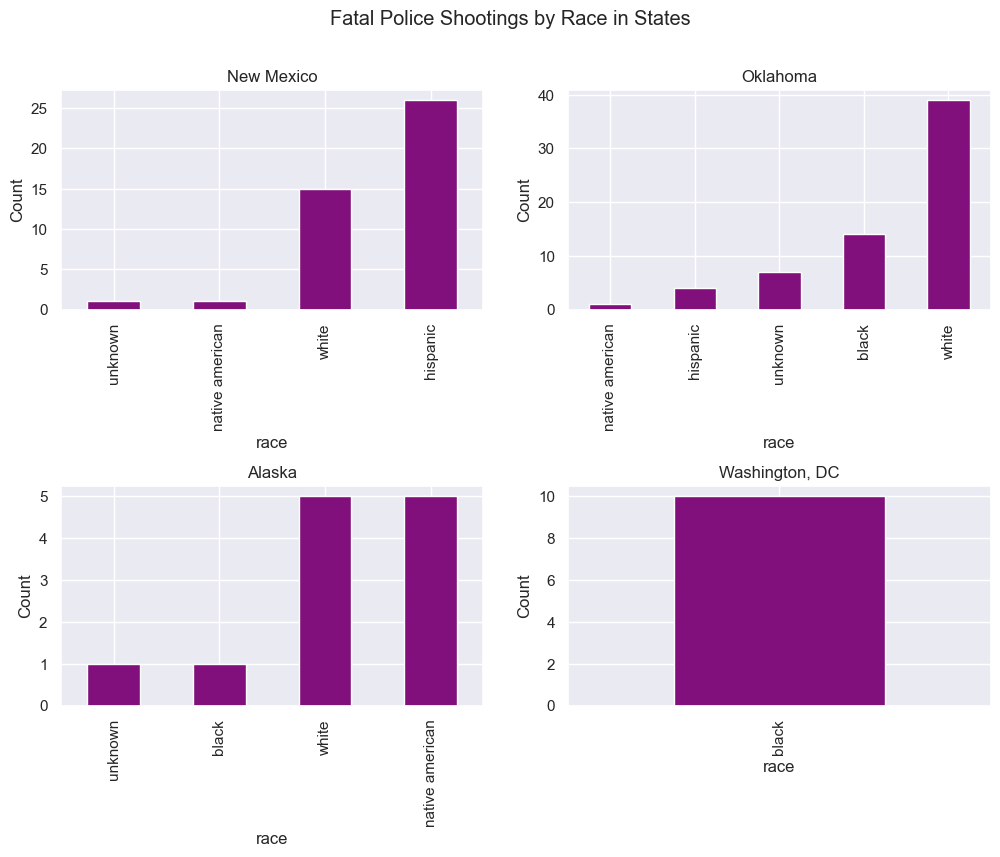

In [78]:
#Bar Plots
plt.figure(figsize=(12, 8))
plt.subplot(221)

plt.suptitle('Fatal Police Shootings by Race in States')

ax = new_mexico_by_race.plot(kind='bar', x='race', 
                             title='New Mexico',
                             ylabel='Count',
                             width=0.5,
                             color=custom_palette[0]);
plt.subplot(222)
ax = oklahoma_by_race.plot(kind='bar', x='race', 
                             title='Oklahoma',
                             ylabel='Count',
                             width=0.5,
                             color=custom_palette[0]);

plt.subplots_adjust(hspace=0.8, wspace=0.2)

plt.subplot(223)
ax = alaska_by_race.plot(kind='bar', x='race', 
                             title='Alaska',
                             ylabel='Count',
                             width=0.5,
                             color=custom_palette[0]);
plt.subplot(224)
ax = washington_dc_by_race.plot(kind='bar', x='race', 
                             title='Washington, DC',
                             ylabel='Count',
                             width=0.5,
                             color=custom_palette[0]);

#### 2.9.3. Counts by Population Analysis 

We can see that in New Mexico hispanic has the biggest count, in Oklahoma white race, in Alaska - Native American and in Washington DC only Black people was shot. Let's analyze how it compares to race population in those states. 

Coefficients taken from stats.gov

In [79]:
new_mexico_by_race_df = pd.DataFrame(new_mexico_by_race)

new_mexico_by_race_df.loc['native american', 'population_all_race'] = 0.112
new_mexico_by_race_df.loc['hispanic', 'population_all_race'] = 0.502
new_mexico_by_race_df.loc['white', 'population_all_race'] = 0.357

new_mexico_by_race_df['shootings_by_race'] = new_mexico_by_race_df['name'] / (population_by_state.\
                                           loc[population_by_state['state'] == 'Oklahoma','population'].values[0]*\
                                            new_mexico_by_race_df['population_all_race'])

new_mexico_by_race_df = new_mexico_by_race_df.sort_values(by='shootings_by_race', ascending=False)

oklahoma_by_race_df = pd.DataFrame(oklahoma_by_race)

oklahoma_by_race_df.loc['native american', 'population_all_race'] = 0.095
oklahoma_by_race_df.loc['black', 'population_all_race'] = 0.079
oklahoma_by_race_df.loc['hispanic', 'population_all_race'] = 0.121
oklahoma_by_race_df.loc['white', 'population_all_race'] = 0.634

oklahoma_by_race_df['shootings_by_race'] = oklahoma_by_race_df['name'] / (population_by_state.\
                                           loc[population_by_state['state'] == 'Oklahoma','population'].values[0]*\
                                            oklahoma_by_race_df['population_all_race'])

oklahoma_by_race_df = oklahoma_by_race_df.sort_values(by='shootings_by_race', ascending=False)

alaska_by_race_df = pd.DataFrame(alaska_by_race)

alaska_by_race_df.loc['native american', 'population_all_race'] = 0.157
alaska_by_race_df.loc['black', 'population_all_race'] = 0.037
alaska_by_race_df.loc['hispanic', 'population_all_race'] = 0.077
alaska_by_race_df.loc['white', 'population_all_race'] = 0.588

alaska_by_race_df['shootings_by_race'] = alaska_by_race_df['name'] / (population_by_state.\
                                           loc[population_by_state['state'] == 'Oklahoma','population'].values[0]*\
                                            oklahoma_by_race_df['population_all_race'])

alaska_by_race_df = alaska_by_race_df.sort_values(by='shootings_by_race', ascending=False)

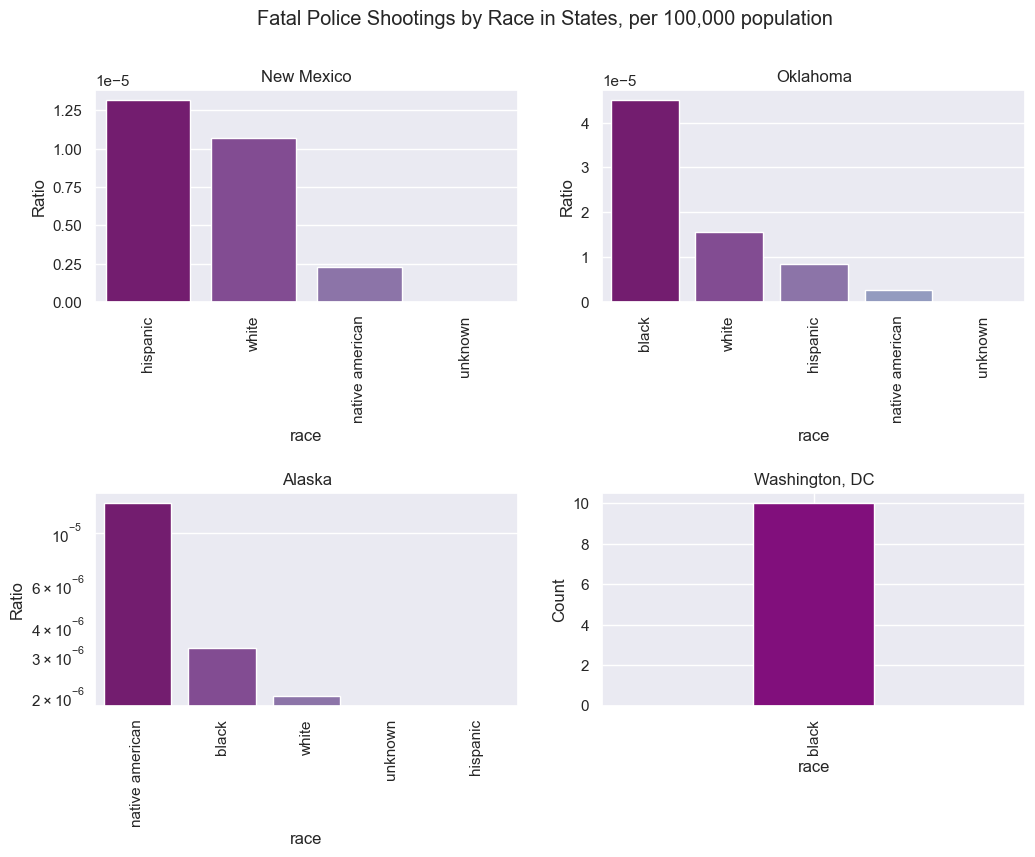

In [80]:
plt.figure(figsize=(12, 8))

plt.suptitle('Fatal Police Shootings by Race in States, per 100,000 population')

plt.subplot(221)
ax = sns.barplot(data=new_mexico_by_race_df,  x=new_mexico_by_race_df.index, y='shootings_by_race');
ax.set_title("New Mexico");
plt.xticks(rotation=90);
ax.set_ylabel('Ratio')

plt.subplot(222)
ax=sns.barplot(data=oklahoma_by_race_df,  x=oklahoma_by_race_df.index, y='shootings_by_race');
ax.set_title('Oklahoma');
plt.xticks(rotation=90);
ax.set_ylabel("Ratio")

plt.subplot(223)
ax = sns.barplot(data=alaska_by_race_df, x=alaska_by_race_df.index, y='shootings_by_race')
plt.yscale('log')
ax.set_title('Alaska')
ax.set_ylabel('Ratio')
plt.xticks(rotation=90);

plt.subplots_adjust(hspace=0.9, wspace=0.2);

plt.subplot(224)
ax = washington_dc_by_race.plot(kind='bar', x='race', 
                             title='Washington, DC',
                             ylabel='Count',
                             width=0.2);

We see that in top 4 states by shootings, black race has the biggest ratio in Oklahoma and Washington. In New Mexico, Hispanic people are shooted the most, in Alaska - Native American.

It is visible that taken into account ratios, Oklahoma's race that has the biggest count has changed. Other states did not change the biggest count. 

#### 2.9.4. Body camera data on Top 4 states

In [81]:
#Data Prep 
new_mexico_body_camera = get_value_counts(new_mexico_data, 'body_camera')
oklahoma_body_camera = get_value_counts(oklahoma_data, 'body_camera')
alaska_body_camera = get_value_counts(alaska_data, 'body_camera')
washington_dc_body_camera = get_value_counts(washington_dc_data, 'body_camera')

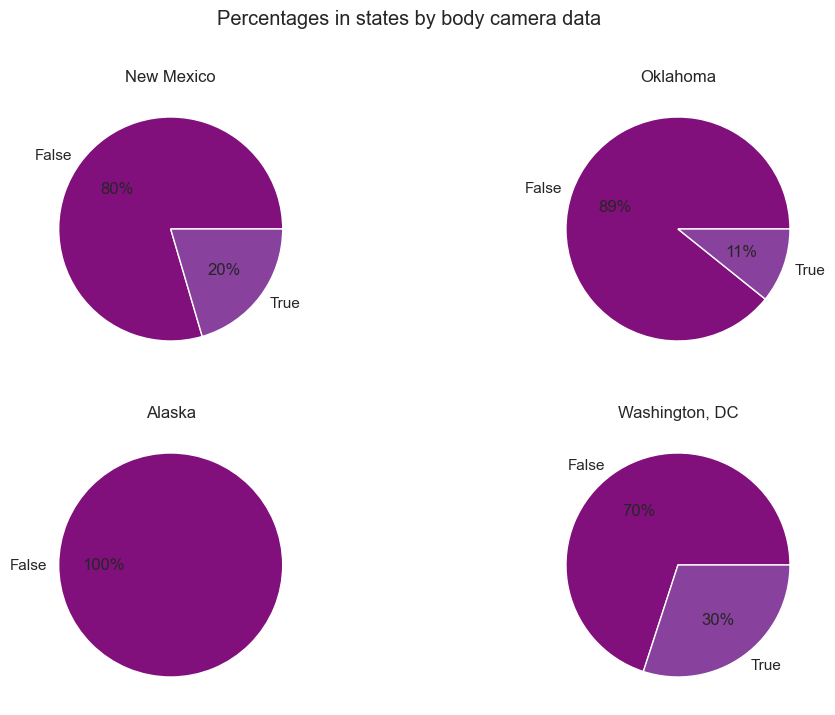

In [82]:
# Pie charts
plt.figure(figsize=(12, 8))
plt.subplot(221)
ax = plt.pie(new_mexico_body_camera, labels = new_mexico_body_camera.index, autopct="%.0f%%");
plt.title("New Mexico");

plt.subplot(222)
ax = plt.pie(oklahoma_body_camera, labels = oklahoma_body_camera.index, autopct="%.0f%%");
plt.title("Oklahoma");

plt.subplot(223)
ax = plt.pie(alaska_body_camera, labels = alaska_body_camera.index, autopct="%.0f%%");
plt.title("Alaska");

plt.subplot(224)
ax = plt.pie(washington_dc_body_camera, labels = washington_dc_body_camera.index, autopct="%.0f%%");
plt.title("Washington, DC");

plt.suptitle('Percentages in states by body camera data');

We see that there is no cases in Alaska that would have body camera footage. It was only introduced in 2023, so that is why it is not visible in 2015-2017 data. It is important to note that it might be other countries that did not have funding for body cameras to be introduced back then. 

Only Oklahoma has similar counts to the country ratios, New Mexico and Washington DC has lower cases with body cameras turned off.

### 2.10. Fatal shootings over time

**Fatal shootings by month**

In [83]:
#Data prep
monthly_data = shootings_data.resample('M', on='date')['id'].count()
monthly_data.index = monthly_data.index.strftime('%Y-%m')
monthly_data.head()

date
2015-01    76
2015-02    77
2015-03    92
2015-04    84
2015-05    71
Name: id, dtype: int64

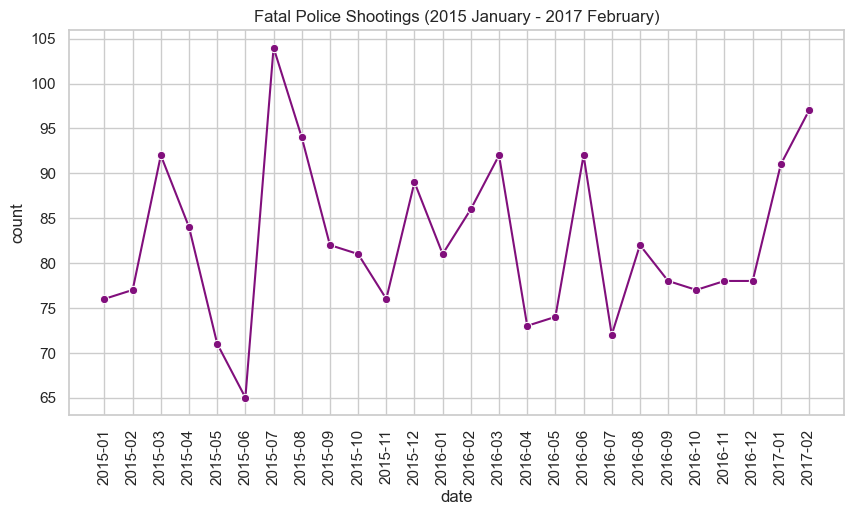

In [84]:
#Line plot
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax= sns.lineplot(data=monthly_data, marker='o')
plt.xticks(rotation=90);
ax.set_title("Fatal Police Shootings (2015 January - 2017 February)");
ax.set_ylabel("count");

There is no obvious trend throughout the provided date timestamps. I will take a look in weekly data. 

**Fatal shootings by weekday**

In [85]:
shootings_data['weekday'] = shootings_data['date'].dt.strftime('%A')
weekday_counts = shootings_data.groupby('weekday', sort=False)['id'].count()
# Create a custom order for weekdays
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Sort the results based on the custom order
weekday_counts = weekday_counts.reindex(weekday_order)
weekday_counts

weekday
Sunday       307
Monday       273
Tuesday      323
Wednesday    335
Thursday     311
Friday       301
Saturday     292
Name: id, dtype: int64

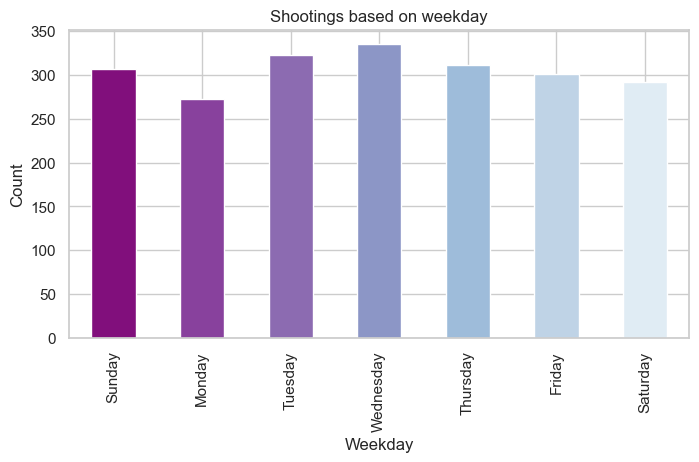

In [86]:
ax = weekday_counts.plot(kind='bar', color=custom_palette, title='Shootings based on weekday');
ax.set_xlabel("Weekday"); 
ax.set_ylabel("Count");

There is no clear trend on weekdays as well. we can see that the biggest count is for Wednesday, but five days has count more than 300.

### 2.11. Conclusions


- Data needed small improvements, overall data quality is good, 
- Most victims were males,
- People with mental illness are shot more often than those are not, based on their population. 
- In more than 60% cases victims were attacked first, police officers were threatened, 
- More than 60% victims were not fleeing. 
- 89% percent cases did not have body camera data.
- By counts white race are shot most often, but when taken in account the counts for other races, black race has the biggest number of victims. 
- Out of 2142 cases 1200 were armed with a gun. 

- The biggest victims count is in California, Texas and Florida however it is important to note that these states are most populated. 
- Taken into account population, the biggest victims count per 100,000 people are in New Mexico, Oklahoma, Alaska and Washington DC. 

- I would suggest making improvements from those states. Albuquerque, Oklahoma City, Anchorage, Fairbanks and Washington DC are the cities that should looked at first. 
- Taken into account populations of races, for New Mexico hispanic people are shot the most, Oklahoma - black people, Alaska - native american. Important to note that in Washington DC only black people were shot. 

The most important things to take a look at are how to improve body cameras footage, gun control and mental illness awareness. 


## 3. U.S. Map 

In [87]:
#Import states map data
shape_path = 'data/shapefiles/cb_2018_us_state_500k.shp'
shape = gpd.read_file(shape_path)

In [88]:
#Join map data and shootings data and define crs
shape = pd.merge(left=shape, right=state_counts_and_population, left_on='NAME',right_on='state', how='right')
shape = shape[~shape['NAME'].isin(['Hawaii', 'Puerto Rico'])]
projected_crs = 'ESRI:102003'
shape = shape.to_crs(projected_crs)

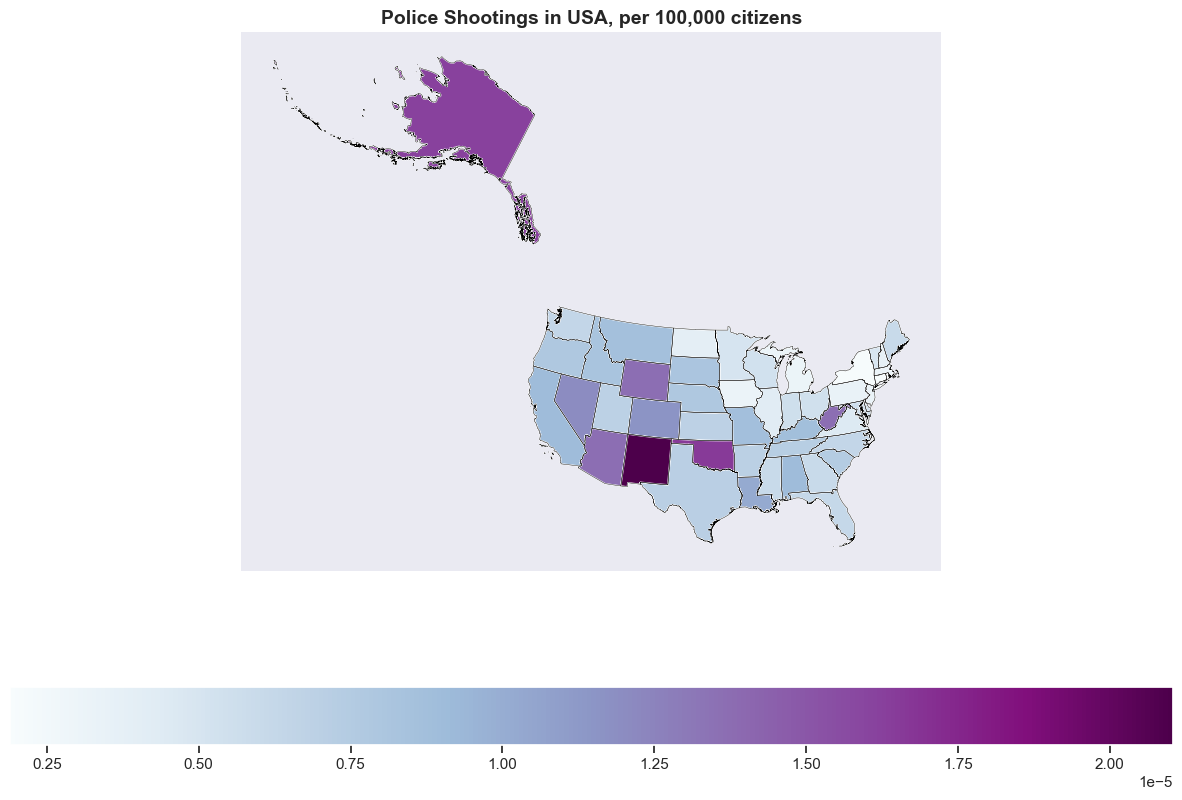

In [89]:
#Map plot
sns.set(rc={'figure.figsize':(30, 10)})
ax = shape.boundary.plot(edgecolor='black', linewidth=0.3);
shape.plot(ax=ax, column='ratio_count_by_population', legend=True, cmap='BuPu', legend_kwds={'shrink':0.5, 
                                                                                'orientation':'horizontal'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible (False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Police Shootings in USA, per 100,000 citizens', size=14, weight='bold');